###### Package Imports

In [2]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

#  Visualize Decision Tree
import graphviz

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

###### Extract Data

In [3]:
CSCO_Features = DataFrame()

In [4]:
CSCO_Features = pd.read_csv('Features.csv', sep='\t')


# Part 5: Predictive Analysis


### Separate Class Label Attribute from attribute vector

In [5]:
CSCO_Features = CSCO_Features.dropna()

In [6]:
#  Class label attribute
y = CSCO_Features['Target_Return']

In [7]:
#  Attribute vector for classification
Feature_Names = ['RSI', 'W %R', '%K', '%D', 'Slow %K', 'Slow %D', 'MACD',
       'MACD Difference', 'MACD Signal', 'PROC 7-Day',
       'PROC 14-Day', 'OBV']

In [8]:
Features = CSCO_Features[Feature_Names].dropna()

### Create Training and Testing Tuples:

In [9]:
#  Test size is 1/4. Stratified. 
X_train, X_test, y_train, y_test = train_test_split(Features, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=400,
                                                    stratify=y)

In [20]:
#  Shape of Training Sets and Testing Sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(359, 12) (359,)
(120, 12) (120,)


### Construct Classifier
n_estimators is the number of trees to build with Random Forest before aggregating the 
predictions. (From the Random Forest Ensemble Property

The splitting criterion used is the Gini impurity


In [11]:
Random_Forest = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=200, 
                                       criterion='gini', 
                                       oob_score=True, 
                                       random_state=10)

### Fit Model 

In [12]:
# Fit to training data
Random_Forest.fit(X_train, y_train.values)
Random_Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

### Show First Decision Tree in Forest  

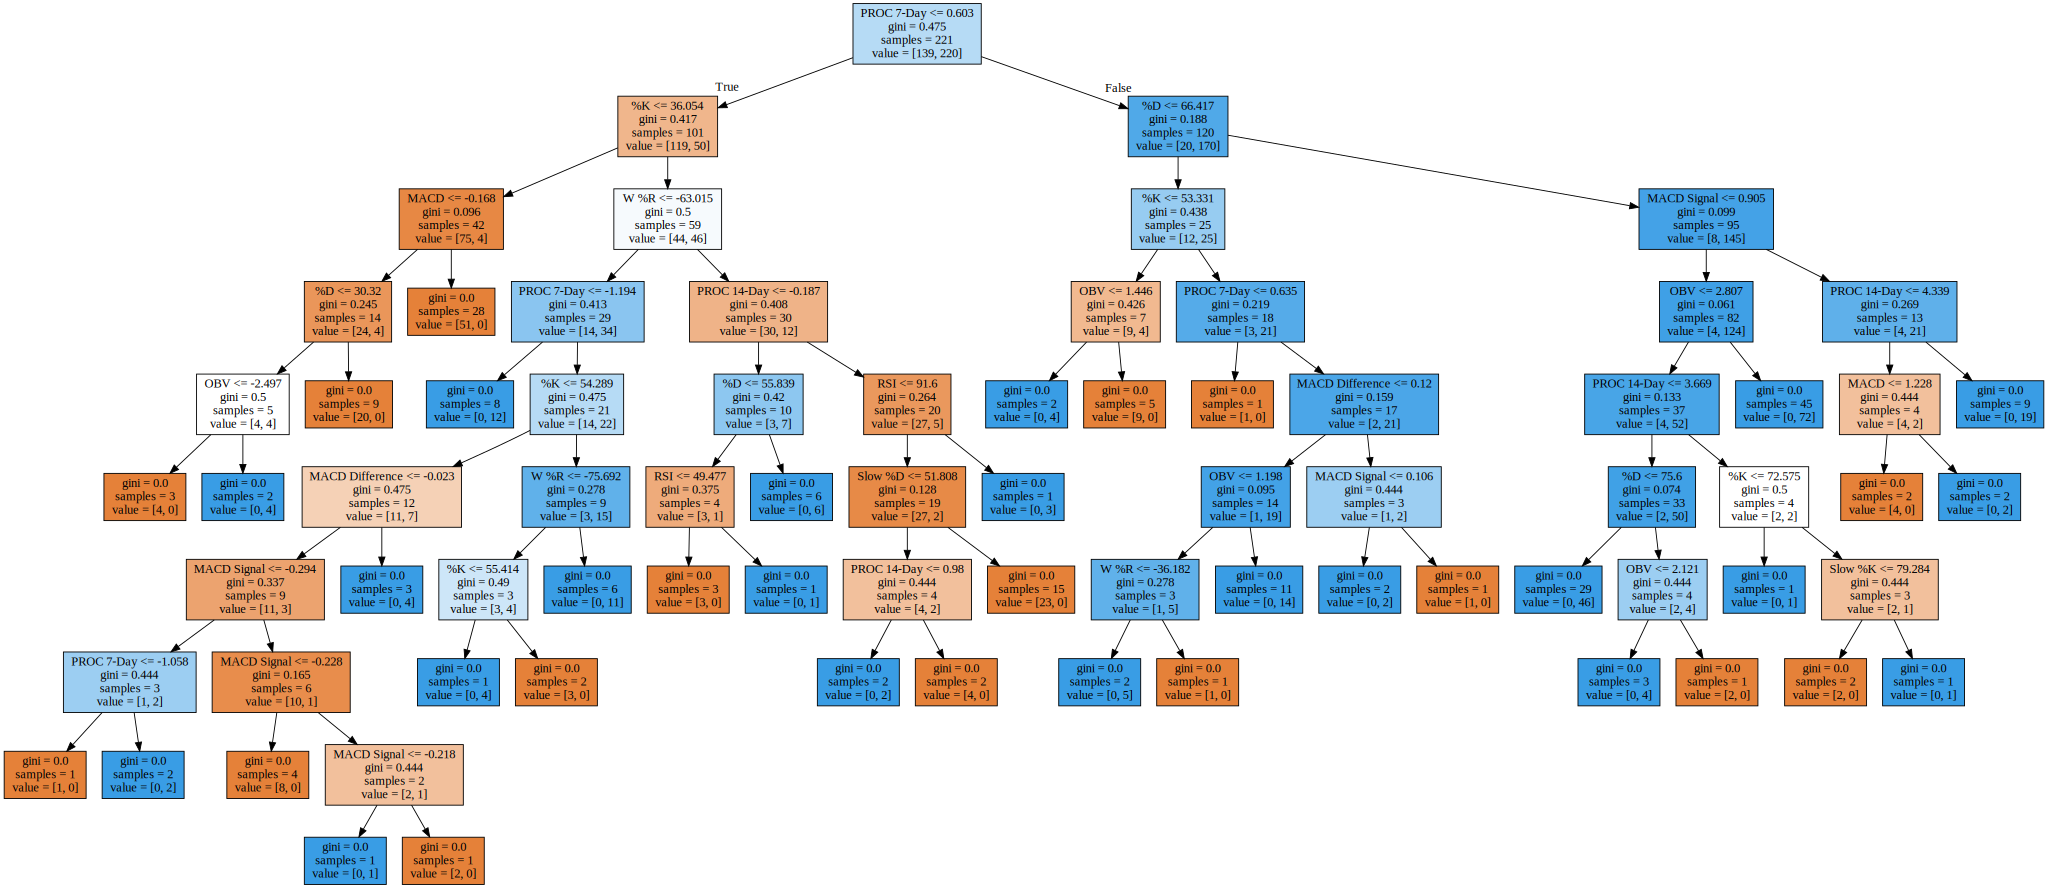

In [13]:
dot_data = tree.export_graphviz(Random_Forest.estimators_[0], filled=True, feature_names=Feature_Names)
graphviz.Source(dot_data)

## Classify Testing Tuples with Classifier

In [14]:
#  Get Predictions
y_pred = Random_Forest.predict(X_test)

## Evaluate Classifier
Precision: TP / (TP + FP)           (Percentage classes labeled true that are actually true)
Recall: TP / (TP + FN)              (Percentage of True Labels that are Labeled true)
f1-score: (2 * P * R) / (P + R)     (Harmonic mean of precision and recall)

support: Used as weights to compute average values of precision, recall, and f1

In [15]:
report = classification_report(y_test, y_pred)

In [16]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.91      0.92      0.92        79

   micro avg       0.89      0.89      0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



#### OOB Score
oob_score is the "out-of-bag" (OOB) error for the forest. This is the average error of 
each training observation calculated using predictions from trees that don't 
contain that observation. 

Accuracy while evaluating instances in the training set using only trees 
for which they were omitted. 


In [17]:
print(Random_Forest.oob_score_)

0.8356545961002786


### Measure Feature Importance



In [18]:
#  Get the importances from the RF
feat_importances = pd.Series(Random_Forest.feature_importances_, 
                             index=Features.columns)

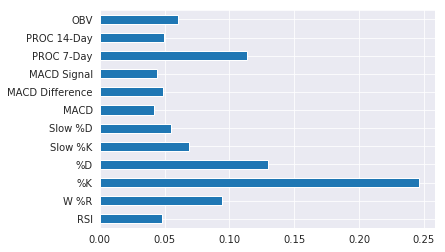

In [19]:
#  Plot the Features
feat_importances.plot(kind='barh')
